In [1]:
# Question 1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('DailyExercise.csv')

The data source is a Kaggle dataset covering the topic of daily exercise routines and their impact on well-being. It keeps track of the person's age, gender, weight in kilograms, height in centimeters, BMI or body mass index, daily steps taken, calories burned, type of exercise, the intensity level of said exercise, and the "output" which states whether the person is fit or unfit.

The link to the dataset: https://www.kaggle.com/datasets/sumitkumbhkarn/daily-exercise-dataset

The main inquiry question is the correlation between exercise and BMI, or in this specific case the relation between calories burned and BMI. Three sub-questions to answer would be the difference between males and females in relation to calories burned and BMI, the calories burned and the specific exercise, and the calories burned and exercise intensity.

Column Headers
 ['gender', 'BMI', 'calories burned', 'type of exercise', 'intensity level']

Missing values:
gender              0
BMI                 0
calories burned     0
type of exercise    0
intensity level     0
dtype: int64

Gender dtype: object
BMI dtype: float64
Calories Burned dtype: int64
Type of Exercise dtype: object
Intensity Level dtype: object

0    M
1    F
2    M
3    F
4    F
Name: gender, dtype: object

0    RUNNING
1    RUNNING
2    WALKING
3    WALKING
4    RUNNING
Name: type of exercise, dtype: object

0         LOW
1         LOW
2        HIGH
3    MODERATE
4        HIGH
Name: intensity level, dtype: object



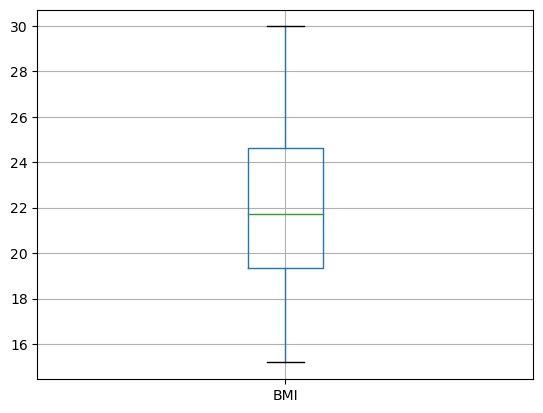

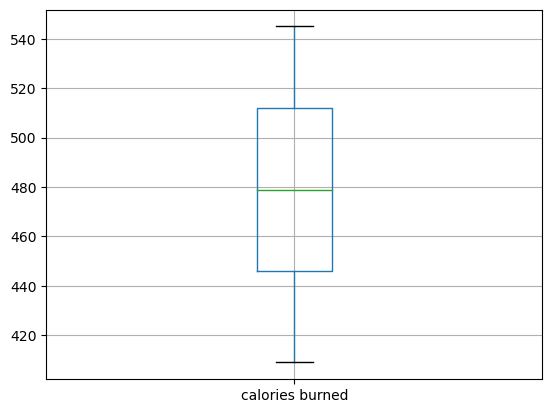

In [2]:
# Question 2
# a. Drop any unwanted features if necessary
df.drop('age', axis=1, inplace=True)
df.drop('weight (KG)', axis=1, inplace=True)
df.drop('height (CM)', axis=1, inplace=True)
df.drop('heart rate (BPM)', axis=1, inplace=True)
df.drop('daily steps', axis=1, inplace=True)
df.drop('OUTPUT', axis=1, inplace=True)
print("Column Headers\n", df.columns.tolist())
print()

# b. Check if there are any missing values and address them
print('Missing values:')
print(df.isnull().sum())
print()

# c. Check if any duplicates and address them
# No need to check for duplicates because each entry is unique for each person

# d. Check the data type of each column and correct them if any
print('Gender dtype:', df['gender'].dtype)
print('BMI dtype:', df['BMI'].dtype)
print('Calories Burned dtype:', df['calories burned'].dtype)
print('Type of Exercise dtype:', df['type of exercise'].dtype)
print('Intensity Level dtype:', df['intensity level'].dtype)
print()

# e. For categorical variables, check if there are any inconsistent inputs and address them
print(df['gender'].head(5))
print()
print(df['type of exercise'].head(5))
print()
print(df['intensity level'].head(5))
print()

# f. For numeric variables, check any outliers and remove them or replace them with a certain value
df.boxplot(column=['BMI'])
plt.show()
print()

df.boxplot(column=['calories burned'])
plt.show()
print()

   gender    BMI  calories burned type of exercise intensity level
0       M  17.37              501          RUNNING             LOW
2       M  20.72              410          WALKING            HIGH
7       M  22.23              468          WALKING            HIGH
10      M  27.43              435          RUNNING             LOW
11      M  20.06              416            OTHER        MODERATE

  gender    BMI  calories burned type of exercise intensity level
1      F  16.98              486          RUNNING             LOW
3      F  22.22              528          WALKING        MODERATE
4      F  24.52              525          RUNNING            HIGH
5      F  18.31              454          WALKING            HIGH
6      F  22.23              424          WALKING             LOW



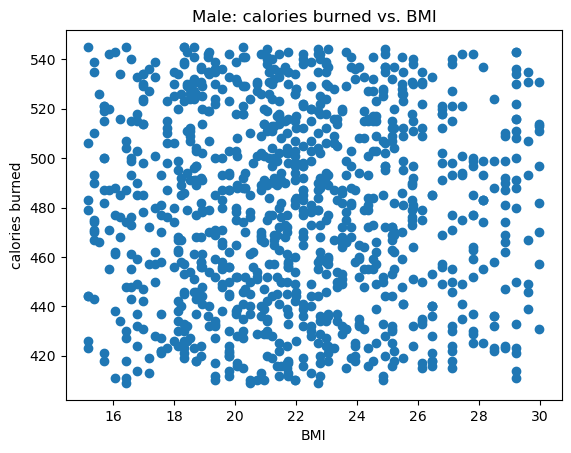

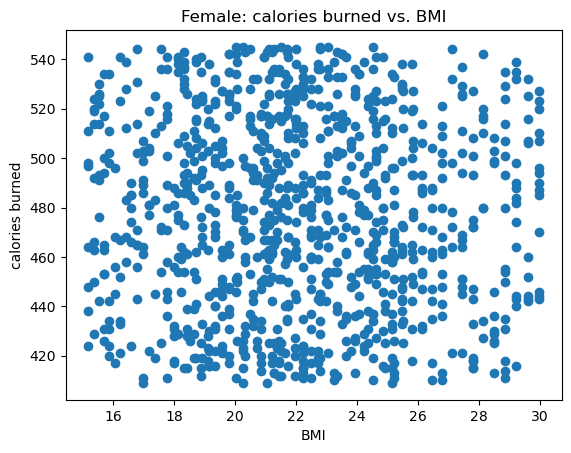

In [3]:
# Question 3
# Question A.a
df_MaleOnly = df[df['gender'].str.contains('M')]
df_FemaleOnly = df[df['gender'].str.contains('F')]

print(df_MaleOnly.head(5))
print()
print(df_FemaleOnly.head(5))
print()

# Question A.b
plt.scatter(df_MaleOnly['BMI'], df_MaleOnly['calories burned'])
plt.ylabel('calories burned')
plt.xlabel('BMI')
plt.title('Male: calories burned vs. BMI')

plt.show()

plt.scatter(df_FemaleOnly['BMI'], df_FemaleOnly['calories burned'])
plt.ylabel('calories burned')
plt.xlabel('BMI')
plt.title('Female: calories burned vs. BMI')

plt.show()

Question 3/Question A.c
The results of the graph show no clear correlation between calories burned and BMI, and no clear difference between men and women in relation to calories burned vs BMI. The average male surveyed fell within the 18 to 24 BMI range, while the average women surveyed fell within the 19 to 26 BMI range.

  gender    BMI  calories burned type of exercise intensity level
2      M  20.72              410          WALKING            HIGH
3      F  22.22              528          WALKING        MODERATE
5      F  18.31              454          WALKING            HIGH
6      F  22.23              424          WALKING             LOW
7      M  22.23              468          WALKING            HIGH

   gender    BMI  calories burned type of exercise intensity level
0       M  17.37              501          RUNNING             LOW
1       F  16.98              486          RUNNING             LOW
4       F  24.52              525          RUNNING            HIGH
10      M  27.43              435          RUNNING             LOW
12      M  16.98              514          RUNNING        MODERATE

   gender    BMI  calories burned type of exercise intensity level
11      M  20.06              416            OTHER        MODERATE
16      F  25.21              413            OTHER             LOW

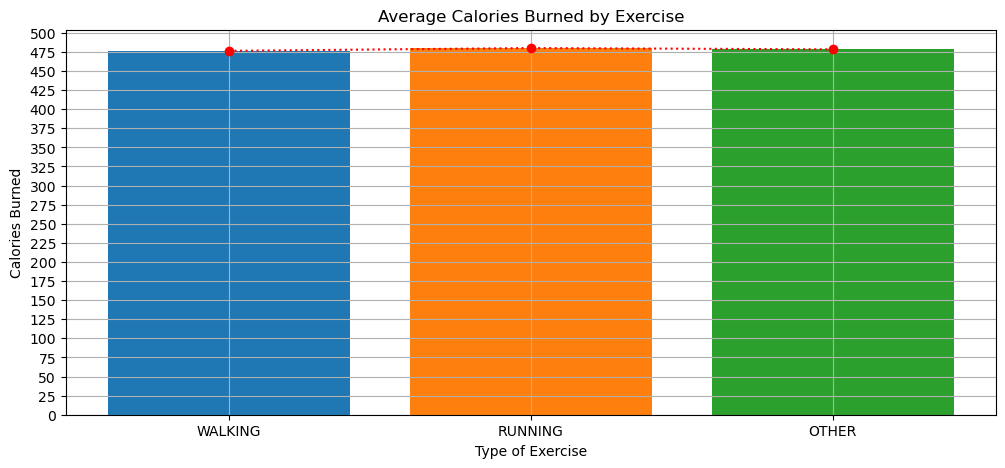

In [4]:
# Question 3
# Question B.a
df_Walking = df[df['type of exercise'].str.contains('WALKING')]
df_Running = df[df['type of exercise'].str.contains('RUNNING')]
df_Other = df[df['type of exercise'].str.contains('OTHER')]

print(df_Walking.head(5))
print()
print(df_Running.head(5))
print()
print(df_Other.head(5))
print()

# Question B.b
walking_AVG = df_Walking['calories burned'].mean()
running_AVG = df_Running['calories burned'].mean()
other_AVG = df_Other['calories burned'].mean()

total = {
    'type of exercise': ['WALKING', 'RUNNING', 'OTHER'],
    'calories burned': [walking_AVG, running_AVG, other_AVG],
}
df_total = pd.DataFrame(total)

exerciseTypes = df_total['type of exercise'].tolist()
caloriesBurned = df_total['calories burned'].tolist()

plt.figure(figsize=(12, 5))
plt.bar(df_Walking['type of exercise'], walking_AVG)
plt.bar(df_Running['type of exercise'], running_AVG)
plt.bar(df_Other['type of exercise'], other_AVG)

plt.plot(exerciseTypes, caloriesBurned, marker='o', linestyle='dotted', color='r',)

plt.xlabel('Type of Exercise')
plt.ylabel('Calories Burned')
plt.yticks(np.arange(0, 501, 25))
plt.title('Average Calories Burned by Exercise')

plt.grid(True)
plt.show()

Question 3/Question B.c
The results in the graph show that all three exercises burn roughly the same amount of calories on average, with running being slightly better than the other two. This suggests that running will in general burn more calories than walking or other exercises. This may be due to running being a more physically intensive exercise than walking or other exerices.

   gender    BMI  calories burned type of exercise intensity level
0       M  17.37              501          RUNNING             LOW
1       F  16.98              486          RUNNING             LOW
6       F  22.23              424          WALKING             LOW
9       F  21.98              538          WALKING             LOW
10      M  27.43              435          RUNNING             LOW

   gender    BMI  calories burned type of exercise intensity level
3       F  22.22              528          WALKING        MODERATE
11      M  20.06              416            OTHER        MODERATE
12      M  16.98              514          RUNNING        MODERATE
14      F  22.23              533          WALKING        MODERATE
17      F  16.79              514          WALKING        MODERATE

  gender    BMI  calories burned type of exercise intensity level
2      M  20.72              410          WALKING            HIGH
4      F  24.52              525          RUNNING            H

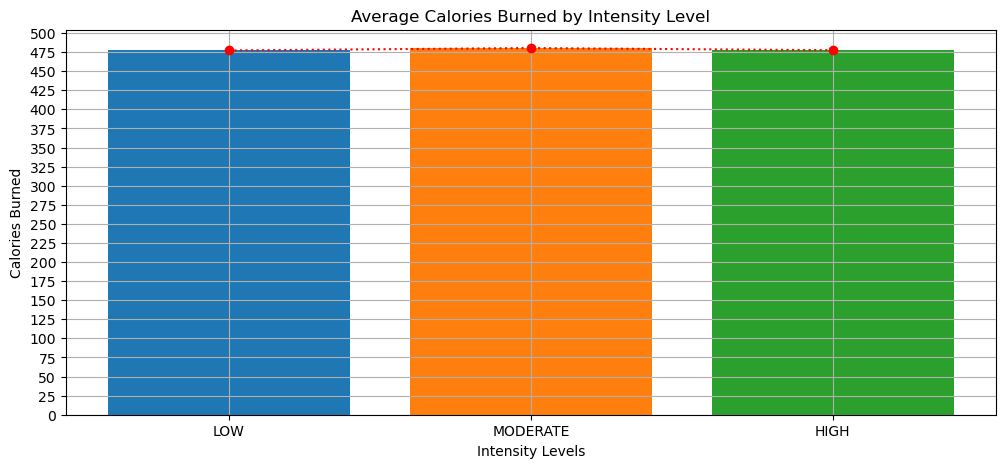

In [5]:
# Question 3
# Question C.a
df_LowIntensity = df[df['intensity level'].str.contains('LOW')]
df_ModerateIntensity = df[df['intensity level'].str.contains('MODERATE')]
df_HighIntensity = df[df['intensity level'].str.contains('HIGH')]

print(df_LowIntensity.head(5))
print()
print(df_ModerateIntensity.head(5))
print()
print(df_HighIntensity.head(5))
print()

# Question B.b
lowIntensity_AVG = df_LowIntensity['calories burned'].mean()
moderateIntensity_AVG = df_ModerateIntensity['calories burned'].mean()
highIntensity_AVG = df_HighIntensity['calories burned'].mean()

total = {
    'intensity level': ['LOW', 'MODERATE', 'HIGH'],
    'calories burned': [lowIntensity_AVG, moderateIntensity_AVG, highIntensity_AVG],
}
df_total = pd.DataFrame(total)

intensityLevels = df_total['intensity level'].tolist()
caloriesBurned = df_total['calories burned'].tolist()

plt.figure(figsize=(12, 5))
plt.bar(df_LowIntensity['intensity level'], lowIntensity_AVG)
plt.bar(df_ModerateIntensity['intensity level'], moderateIntensity_AVG)
plt.bar(df_HighIntensity['intensity level'], highIntensity_AVG)

plt.plot(intensityLevels, caloriesBurned, marker='o', linestyle='dotted', color='r',)

plt.xlabel('Intensity Levels')
plt.ylabel('Calories Burned')
plt.yticks(np.arange(0, 501, 25))
plt.title('Average Calories Burned by Intensity Level')

plt.grid(True)
plt.show()

Question 3/Question C.c
The results in the graph show that all three intensity levels burn roughly the same amount of calories on average, with moderate intensity level burning a slight amount more calories than the other two. This suggests that moderate intensity levels are better for burning more calories. This may be because it is easier to exercise for longer at a moderate intensity level, or maybe due to some other factors.

Question 4
In summary, there doesn't appear to be a clear correlation between exercise and BMI, or in this specific case the relation between calories burned and BMI. When comparing the difference for the two between men and women, there was also no clear correlation between calories burned and BMI. In terms of which exercise burned the most calories, running had the highest average for calories burned. This could be from it being more physically intensive than walking or other exercises. In terms of which intensity level burned the most calories, a moderate intensity level had the highest average for calories burned. This could be because it burns more calories than a low intensity level and takes less energy than a high intensity level, allowing a person to exercise for longer and to burn more calories. The results, especially for correlation between calories burned and BMI, as well as the difference between men and women in terms of calories burned and BMI, are inconclusive. In further research, it may be helpful to explore better ways of comparing and analysing data, such as differences between men and women or the correlation between calories burned and BMI.